In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import os

## Active Transmitters

Download today's data

In [2]:
today_day = date.today().day
today_month = date.today().month
url="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-"+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+".xlsx"
! wget $url --no-check-certificate

--2020-03-20 09:55:25--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:20ee:6400:1d:d83a:40c0:93a1, 2600:9000:20ee::1d:d83a:40c0:93a1, 2600:9000:20ee:3400:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:20ee:6400:1d:d83a:40c0:93a1|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 225974 (221K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx’

COVID-19-geographic 100%[===================>] 220.68K   772KB/s    in 0.3s    

2020-03-20 09:55:26 (772 KB/s) - ‘COVID-19-geographic-disbtribution-worldwide-2020-03-20.xlsx’ saved [225974/225974]



In [3]:
data_fname = 'COVID-19-geographic-disbtribution-worldwide-2020-'+"{0:0=2d}".format(today_month)+"-"+"{0:0=2d}".format(today_day)+'.xlsx'
dat = pd.read_excel(data_fname)
dat.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId
0,2020-03-20,20,3,2020,0,0,Afghanistan,AF
1,2020-03-19,19,3,2020,0,0,Afghanistan,AF
2,2020-03-18,18,3,2020,1,0,Afghanistan,AF
3,2020-03-17,17,3,2020,5,0,Afghanistan,AF
4,2020-03-16,16,3,2020,6,0,Afghanistan,AF


In [14]:
name_dict = {#'Canada':'Canada',
            'South_Korea':'Republic of Korea',
            'Iran':'Iran (Islamic Republic of)',
            'Italy':'Italy',
            'United_States_of_America':'United States of America (and dependencies)',
            'China':'China'}
Countries = list(name_dict.keys())

If we assume a 30 day window of transmission, i.e. after 30 days the virus is no longer transmissible, then we can obtain a value for the # of active transmitters by taking the difference between the cumulative cases up to today and the cumulative cases from 30 days ago

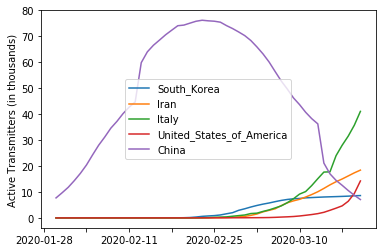

In [15]:
dat['DateRep']= pd.to_datetime(dat['DateRep'])
fig, ax = plt.subplots()
for c in Countries:
    # find all rows corresponding to country c
    DF = dat[dat['Countries and territories']==c].sort_values('DateRep')
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days
    DF['DiffCases'] = DF['Cases'].cumsum().diff(30)/1000
    DF = DF[['DateRep','DiffCases']].dropna()

    plt.plot(DF['DateRep'],DF['DiffCases'])
    
    # only show every other date tick (avoid clutter)
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.legend(Countries)
plt.ylabel('Active Transmitters (in thousands)')
plt.show()

## Active transmitters as a % of total population

In [16]:
world_pop = pd.read_csv('world_population.csv')
world_pop_2020 = world_pop[world_pop['Time']==2020]
world_pop = world_pop_2020[world_pop_2020['Variant']=='Medium']
world_pop[world_pop['Location']=='Canada']['PopTotal']*1000

38752    37742157.0
Name: PopTotal, dtype: float64

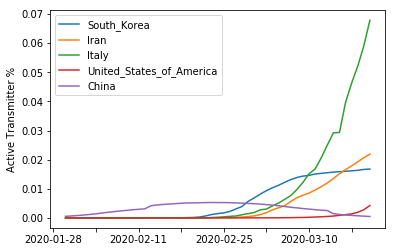

In [17]:
Countries = list(name_dict.keys())
fig, ax = plt.subplots()
for c in Countries:
    NationPop = world_pop[world_pop['Location']==name_dict[c]]['PopTotal']*1000
    NationPop = list(NationPop)[0]
    # find all rows corresponding to country c
    DF = dat[dat['Countries and territories']==c].sort_values('DateRep')
    
    # cumulative sum of cases - cumulative sum of cases 30 days ago
    # i.e. all new cases from the past 30 days
    DF['DiffCases'] = DF['Cases'].cumsum().diff(30)
    DF = DF[['DateRep','DiffCases']].dropna()
    DF['FracPop'] = DF['DiffCases']/NationPop*100
    plt.plot(DF['DateRep'],DF['FracPop'])
    
    # only show every other date tick (avoid clutter)
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.legend(Countries)
plt.ylabel('Active Transmitter %')
plt.show()

In [56]:
world_pop['Location'].unique()

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African, Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'American Samoa', 'Andean Community', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Cari